In [2]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

# load CSV into a DataFrame

df = pd.read_csv("all_month.csv")

#Increase the maximum number of rows to display the entire DataFrame
pd.options.display.max_rows = 9999
print(df.to_string())
print(pd.options.display.max_rows) 

C:\Users\Chris\AppData\Local\Temp\ipykernel_27736\2317597335.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                          time   latitude   longitude       depth   mag magType    nst         gap       dmin       rms net            id                   updated                                                    place          type  horizontalError  depthError  magError  magNst     status locationSource magSource
0     2024-01-18T02:18:19.690Z  38.807835 -122.823334    2.030000  1.49      md   21.0   54.000000   0.004681  0.020000  nc    nc73990876  2024-01-18T02:19:54.732Z                              7 km WNW of The Geysers, CA    earthquake         0.220000    0.310000  0.150000    22.0  automatic             nc        nc
1     2024-01-18T02:16:52.710Z  38.808498 -122.823669    2.010000  1.33      md   23.0   53.000000   0.004320  0.020000  nc    nc73990871  2024-01-18T02:28:11.196Z                              7 km WNW of The Geysers, CA    earthquake         0.190000    0.340000  0.140000    23.0  automatic             nc        nc
2     2024-01-18T01:55:45.006Z  64.994500 -147

In [3]:
#df.describe()
#df.info()
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [4]:
# identified empty values
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1794
gap                1794
dmin               2921
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2537
depthError            0
magError           1810
magNst             1796
status                0
locationSource        0
magSource             0
dtype: int64

In [5]:
for column in df.columns:                      
    if pd.api.types.is_numeric_dtype(df[column]):   # Errors without restricitng to numeric columns
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# check empty values have been filled
df.isnull().sum()

C:\Users\Chris\AppData\Local\Temp\ipykernel_27736\42161577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [6]:
# Check for any duplicated rows in the entire DataFrame
duplicated_rows = df.duplicated()                                   # results in boolean series

# Check if there are any duplicated values in the entire DataFrame
if duplicated_rows.any() == True:        #  checks if there is at least one True value in the duplicated_rows Series, meaning that there is at least one duplicated row in the DataFrame. 
    print(duplicated_rows) 

In [7]:
# Split the 'place' column and extract the text after the comma to group earthquakes around the same area together.
place_split = df['place'].str.split(',', expand=True)

# Select the second part of the split (text after the comma) and fill NaN values with the original 'place' column
df['place'] = place_split[1].fillna(df['place'])

In [8]:
df.head() # check that valeus of place has been split - now only have broad regions for places. 

df["place"].value_counts()

place
 CA                                                      2672
 Alaska                                                  2490
 Hawaii                                                   556
 Nevada                                                   533
 Texas                                                    359
 Montana                                                  352
 Puerto Rico                                              236
 New Mexico                                               180
 Washington                                               178
 Oklahoma                                                 141
 Japan                                                    116
 Indonesia                                                 78
 Idaho                                                     71
 California                                                69
 Utah                                                      68
 Philippines                                               58
 C

In [9]:
# compares numbers of earquakes in each region
regions = df["place"].value_counts()

# Replacing counts under 50 location with Other
series = pd.Series(regions)

# Replace places with counts less than 50 with "Other"
series.index = series.index.where(series >= 50, 'Other')

merged_series = series.groupby(series.index).sum()

# Display the merged Series
print(merged_series)

place
 Alaska         2490
 CA             2672
 California       69
 Hawaii          556
 Idaho            71
 Indonesia        78
 Japan           116
 Montana         352
 Nevada          533
 New Mexico      180
 Oklahoma        141
 Philippines      58
 Puerto Rico     236
 Texas           359
 Utah             68
 Washington      178
Other            729
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2077cde4230>,
 [Text(0.6446115832910077, 0.8913337796174116, ' CA'),
  Text(-1.0247910791378898, 0.3997539794916362, ' Alaska'),
  Text(-0.7926593263771927, -0.7626868245271156, 'Other'),
  Text(-0.3775619102563555, -1.033173269071346, ' Hawaii'),
  Text(0.038104310122225475, -1.0993398298752344, ' Nevada'),
  Text(0.4800681536737826, -1.3151177011310606, ' Texas'),
  Text(0.7920913843856328, -1.1543791572884758, ' Montana'),
  Text(1.013289663681007, -0.9660455773291611, ' Puerto Rico'),
  Text(1.143919084252004, -0.8071239859427156, ' New Mexico'),
  Text(1.2366528755797108, -0.656269506620895, ' Washington'),
  Text(1.3026540696259323, -0.5129253112169422, ' Oklahoma'),
  Text(1.3438213312590055, -0.3926120599946909, ' Japan'),
  Text(1.3675689246315568, -0.2995917829014796, ' Indonesia'),
  Text(1.3814464941828544, -0.22716862395564535, ' Idaho'),
  Text(1.3909940432028174, -0.15854201895484574, ' California'),
  Text(1.3970387910519475, -0.09100888

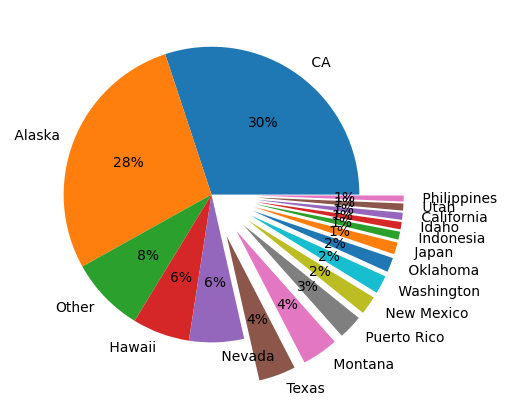

In [10]:
# ordering the data into decending order
merged_series_df = merged_series.to_frame() # put the count values into a data frame
merged_series_df.reset_index()
pie_df = merged_series_df.sort_values("count", ascending=False)

# separate the segments in the pie chart
explode = (0,0,0,0,0,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3)

plt.pie(pie_df["count"], labels=pie_df.index, autopct ='%1.0f%%',explode = explode)

Text(0.5, 1.0, 'The location of Earthquakes from their Latitude and Longitude')

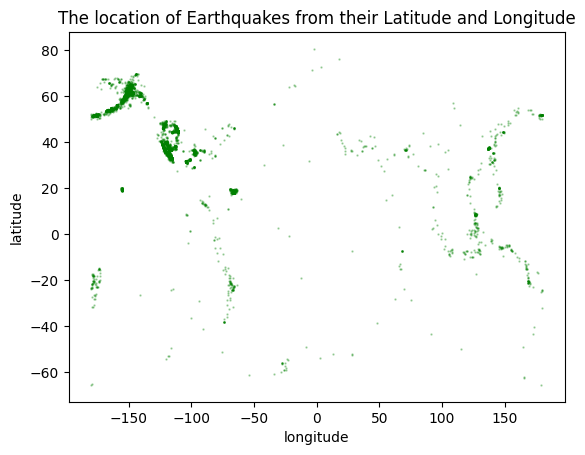

In [12]:
# plot scatter graph
df.plot(kind="scatter", x="longitude",y="latitude",s=0.5, color="green", alpha = 0.3)
plt.title("The location of Earthquakes from their Latitude and Longitude")